In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Session 04

## Supervised Logistic Regrsssion

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris, make_blobs
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [3]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

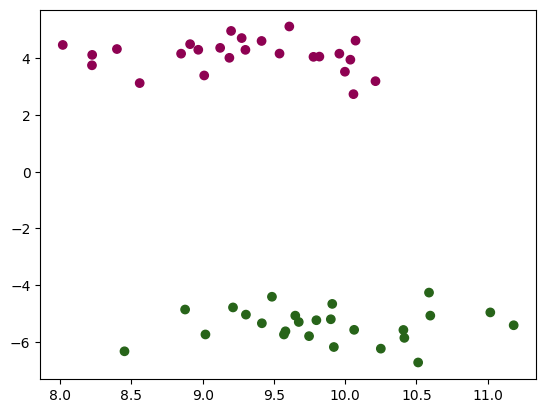

In [4]:
X, y = make_blobs(n_samples=50, centers=2, random_state=RANDOM_STATE, cluster_std=0.6)

plt.scatter(X[:,0], X[:, 1], c = y, cmap = plt.cm.PiYG)

In [5]:
clf = SVC(kernel='linear')

clf.fit(X,y)

y_pred = clf.predict(X)

accuracy_score(y, y_pred)

1.0

In [6]:
confusion_matrix(y, y_pred)

array([[25,  0],
       [ 0, 25]])

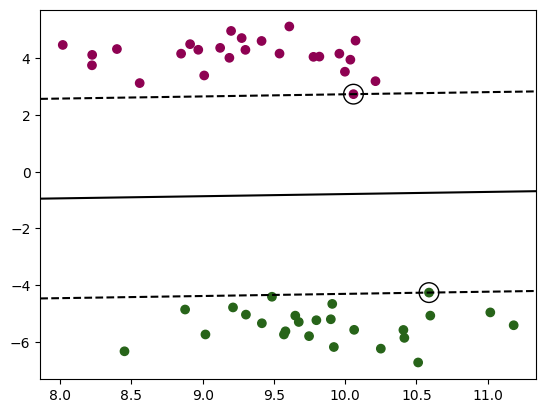

In [7]:
plt.scatter(X[:,0], X[:, 1], c = y, cmap = plt.cm.PiYG)

xLim = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
yLim = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)

YY, XX  = np.meshgrid(yLim, xLim) # generate a mesh

preds = np.zeros_like(XX)

for i, xi in enumerate(xLim):
    for j, yj in enumerate(yLim):
        preds[i,j] = clf.decision_function(np.array([xi, yj]).reshape(1,-1)).item()

plt.contour(XX, YY, preds, colors= 'k', levels=[-1, 0, 1], linestyles = ['--', '-', '--'])

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s = 200, edgecolors='k', facecolor = 'none')

In [8]:
digits = load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [9]:
#print (digits.DESCR)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    stratify=digits.target,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

SVC: kernel :linear  | F1 score: 0.9777
SVC: kernel :rbf     | F1 score: 0.9861
SVC: kernel :poly    | F1 score: 0.9916


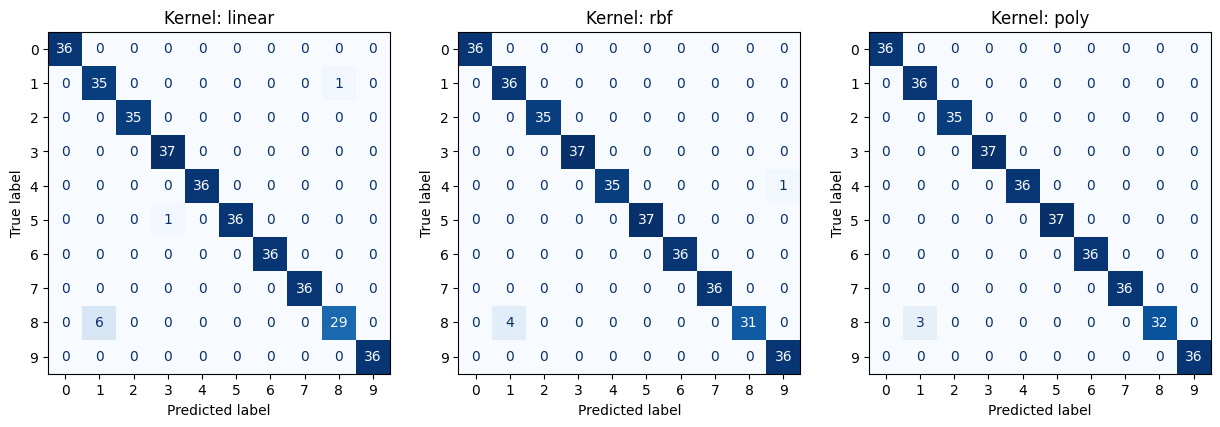

In [14]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1,3, figsize = (15,8)) # instantiate plt object

for i, knl in enumerate(['linear', 'rbf', 'poly']):

    clf = SVC(kernel=knl).fit(X_train, y_train)
    y_pred = clf.predict(X_test)oly    | F1 score: 0.9916
    print (f'SVC: kernel :{knl: <7} | F1 score: {f1_score(y_test, y_pred, average = "weighted"):.4f}')

    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)

    disp.plot(ax = axes[i], cmap =plt.cm.Blues, colorbar = False)
    axes[i].set_title(f'Kernel: {knl}')


In [16]:
digits.data.shape

(1797, 64)

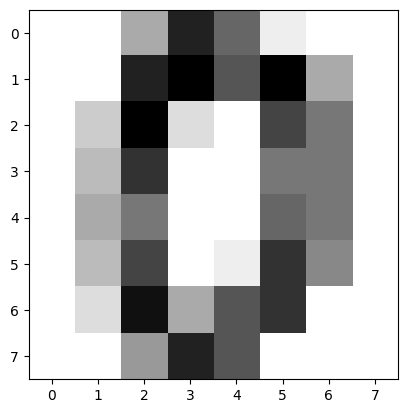

In [21]:
plt.imshow(digits.data[0].reshape(8,8)/16, cmap = plt.cm.binary)

In [24]:
iris = load_iris()

features = iris.data
labels= iris.target

features.shape, labels.shape

((150, 4), (150,))

In [31]:
# For convenience, create a function to plot
def plot_hyplane(classifier, features, labels, i):
    plt.subplot(1, 3, i )
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    pred = classifier.predict(features) # make prediction
    
    x_min, x_max = features[:, 0].min() - .1, features[:, 0].max() + .1
    y_min, y_max = features[:, 1].min() - .1, features[:, 1].max() + .1

    xx, yy = np.meshgrid ( np.linspace ( x_min, x_max, 1000 ),
                       np.linspace ( y_min, y_max, 1000))
    Z = classifier.predict ( np.c_[ xx.ravel(), yy.ravel()])

    # Plot the decision surface
    Z = Z.reshape( xx.shape )
    plt.grid(False)
    plt.pcolormesh(xx, yy, Z, cmap = plt.cm.Set3 ) # refer http://matplotlib.org/users/colormaps.html

    # Plot also the training points
    plt.scatter( features [ :, 0], features [ :, 1], c = labels, s = 10,
            cmap=plt.cm.flag)

    plt.axis('tight')

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(features)

features.shape, pca_features.shape

((150, 4), (150, 2))

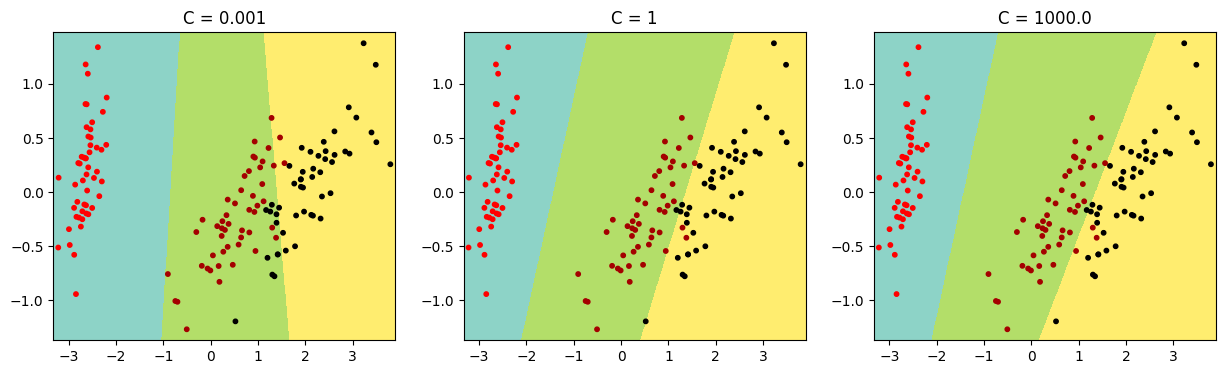

In [33]:
fig, axes = plt.subplots(1,3, figsize=(15,4) )

C_values = [1e-3, 1, 1e3]

for i, C in enumerate(C_values):

    clf = SVC(kernel='linear', C = C)

    clf.fit(pca_features, labels)

    plot_hyplane(clf, pca_features, labels, i+1)

    plt.title(f'C = {C}')

plt.show()

# # Gamma

- Small Gamma $\rightarrow$ low bias, high variance

- Large Gamma$\rightarrow$ high bias, low variance

gamma = [0.001, 1, 'auto']

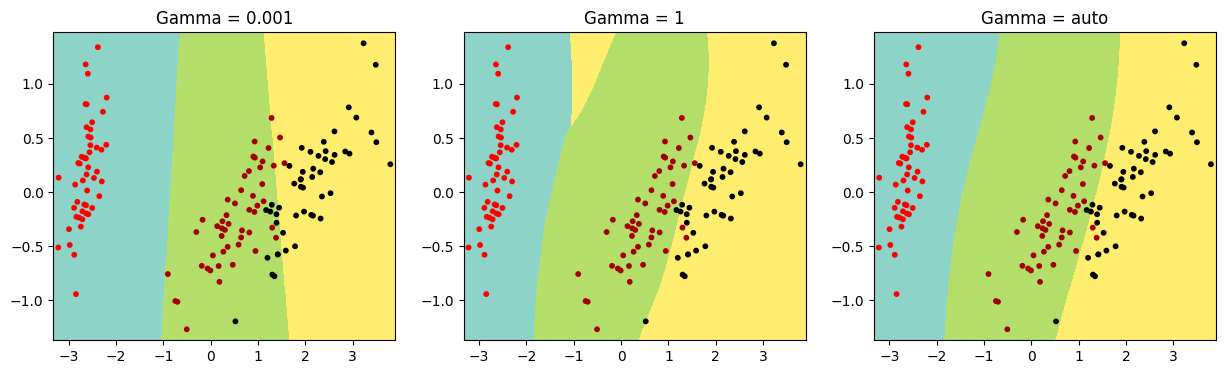

In [35]:
fig, axes = plt.subplots(1,3, figsize=(15,4) )

gammas = [0.001, 1, 'auto']

for i, gm in enumerate(gammas):

    clf = SVC(kernel='rbf', gamma = gm)

    clf.fit(pca_features, labels)

    plot_hyplane(clf, pca_features, labels, i+1)

    plt.title(f'Gamma = {gm}')

plt.show()